In [54]:
#placa de dos materiales
import numpy as np
import matplotlib.pyplot as plt

# discretización de placa
dx = 2.5
dy = dx
Lx = 10
Ly = 10

x = np.arange(0,Lx+dx,dx)
y = np.arange(0,Ly+dy,dy)

X, Y = np.meshgrid(x,y)

T = np.zeros([y.size,x.size])
Tviejo = np.zeros([y.size,x.size])
dTdx = np.zeros([y.size,x.size])
dTdy = np.zeros([y.size,x.size])
#limite del material
ix5 = int(5/dx)

#constantes del material
ka = 0.5
kb = 0.3
hc = 0.1
Ta = 25

#condiciones de frontera de dirichlet
T[:,0] = 50
T[0] = 100
# condiciones de frontera de neuman
qxf = 0
dTdx[:,-1] = -qxf/kb
qyf = 0
dTdx[-1,0:ix5] = -qyf/ka



In [55]:
#calculo de T
Error = 1
while Error > 0.01:
    Tviejo[:][:]=T[:][:]
    for j in np.arange(1,y.size):
        for i in np.arange(1,x.size):
        
            if (j==y.size-1):
                if (i<ix5):
                    T[j,i]=(T[j,i+1]+T[j,i-1]+2*T[j-1,i]+2*dy*dTdy[j,i])/4
                elif (i>ix5) & (i<x.size-1):
                    T[j,i]=(kb*(T[j,i-1]+T[j,i+1]+2*T[i,j-1])+2*Ta*hc*dx)/(4*kb+2*hc*dx)
                elif (i==ix5):
                    T[j,i] = (ka*T[j,i-1]+kb*T[j,i+1]+(ka+kb)*T[j-1,i]+hc*Ta*dx)/(2*ka+2*kb+hc*dx)
                else:
                    T[j,i] = 25
            elif (i==x.size-1):
                if (j==y.size-1):
                    T[j,i] = 25
                else:
                    T[j,i] = (2*T[j,i-1]+T[j+1,i]+T[j-1,i])/4
            
            elif (i == ix5):
                T[j,i] = (kb*T[j,i+1]+ka*T[j,i-1]+((ka+kb)/2)*T[j+1,i]+((ka+kb)/2)*T[j-1,i])/(2*ka+2*kb)
                
            else:
                T[j,i]=(T[j,i+1]+T[j,i-1]+T[j+1,i]+T[j-1,i])/4
    E = np.abs((T-Tviejo)/T)
    Error = E.max()

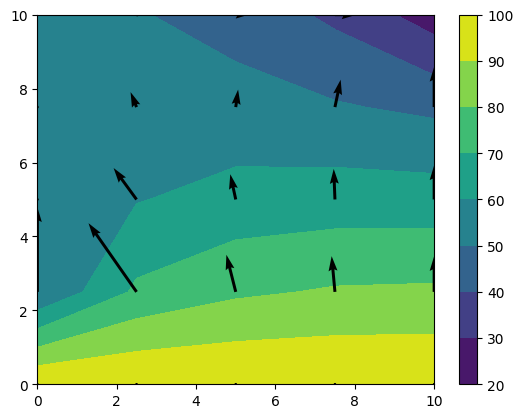

In [64]:
for j in np.arange(1,y.size-1):
    dTdy[j,:] = (T[j+1,:]-T[j-1,:])/2/dy

for i in np.arange(1,y.size-1):
    dTdx[:,i] = (T[:,i+1]-T[:,i-1])/2/dx

qx = np.zeros([y.size,x.size])
qy = np.zeros([y.size,x.size])
qx[:,0:ix5] = -ka*dTdx[:,0:ix5]
qx[:,ix5:x.size] = -kb*dTdx[:,ix5:x.size]
qy[:,0:ix5] = -ka*dTdy[:,0:ix5]
qy[:,ix5:x.size] = -kb*dTdy[:,ix5:x.size]
plt.contourf(X,Y,T)
plt.colorbar()
plt.quiver(x,y,qx,qy)